# Objective
### Timeframe were a car accident is more probable to happend on Chicago during the period 2018 to 2022
## What is the timeframe more probable for a car accident to happen in Chicago during the period 2018 to 2022 (excluding 2020)
- Months with most accidents
- Day of those months with the most accidents 
- Time of the day for the accidents

## Data source: 
https://www.kaggle.com/datasets/nathaniellybrand/chicago-car-crash-dataset/data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
crashes_raw = pd.read_csv('Traffic_Crashes_-_Crashes.csv')
crashes_raw.head()

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,012c5bfce715efb2f2b387d6dd86f9c13e9dc1809fb52a...,JG341943,NaN,07/12/2023 03:05:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,...,0.0,0.0,2.0,0.0,15,4,7,41.778542,-87.742065,POINT (-87.742064741348 41.778541938106)
1,01d457f032e23d935a0b8f6b4c88221375180ffd4cd959...,JG338388,NaN,07/12/2023 05:50:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,2.0,0.0,17,4,7,41.742131,-87.721824,POINT (-87.72182410033 41.742130554062)
2,02249b4747a4bf40b88a8357304a98dfeaef9c38eebbf0...,JG350008,NaN,07/12/2023 02:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,OTHER OBJECT,...,0.0,0.0,1.0,0.0,14,4,7,41.719844,-87.584790,POINT (-87.584789974824 41.719844228292)
3,03e3b6caad71b78ed9ae325648effa9512bfb2517aed30...,JG338049,NaN,07/12/2023 07:05:00 AM,30,TRAFFIC SIGNAL,UNKNOWN,FREEZING RAIN/DRIZZLE,DAYLIGHT,REAR END,...,0.0,0.0,2.0,0.0,7,4,7,41.925105,-87.668291,POINT (-87.668291181568 41.925104953308)
4,0481fc919b38f1572d4ba04b069766102d904a662ff096...,JG338431,NaN,07/12/2023 06:30:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,2.0,0.0,18,4,7,41.975258,-87.751991,POINT (-87.751990557158 41.97525809527)


# Cleaning

In [3]:
print(crashes_raw.columns)
print(f'Number of columns: {crashes_raw.columns.__len__()}')

Index(['CRASH_RECORD_ID', 'RD_NO', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LA

### Delete not needed columns

In [4]:
columns_to_delete = ['RD_NO', 'CRASH_DATE_EST_I', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 
                     'ROAD_DEFECT', 'REPORT_TYPE', 'STREET_NO', 'STREET_DIRECTION', 'STREET_NAME', 
                     'WORK_ZONE_I', 'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'LATITUDE', 'LONGITUDE', 
                     'LOCATION', 'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 
                     'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'BEAT_OF_OCCURRENCE']

In [5]:
crashes_with_na = crashes_raw.drop(columns=columns_to_delete)
print(crashes_with_na.columns.tolist())
print(crashes_with_na.columns.__len__())

['CRASH_RECORD_ID', 'CRASH_DATE', 'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED', 'NUM_UNITS', 'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH']
27


In [6]:
crashes_with_na.head()

,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,CRASH_TYPE,...,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
0,012c5bfce715efb2f2b387d6dd86f9c13e9dc1809fb52a...,07/12/2023 03:05:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,NO INJURY / DRIVE AWAY,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,15,4,7
1,01d457f032e23d935a0b8f6b4c88221375180ffd4cd959...,07/12/2023 05:50:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,NO INJURY / DRIVE AWAY,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,17,4,7
2,02249b4747a4bf40b88a8357304a98dfeaef9c38eebbf0...,07/12/2023 02:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,OTHER OBJECT,NOT DIVIDED,NO INJURY / DRIVE AWAY,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,14,4,7
3,03e3b6caad71b78ed9ae325648effa9512bfb2517aed30...,07/12/2023 07:05:00 AM,30,TRAFFIC SIGNAL,UNKNOWN,FREEZING RAIN/DRIZZLE,DAYLIGHT,REAR END,NOT DIVIDED,NO INJURY / DRIVE AWAY,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,7,4,7
4,0481fc919b38f1572d4ba04b069766102d904a662ff096...,07/12/2023 06:30:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,NO INJURY / DRIVE AWAY,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,18,4,7


#### Replacing Na values

In [7]:
crashes_with_na.isna().sum()


CRASH_RECORD_ID                       0
CRASH_DATE                            0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
CRASH_TYPE                            0
INTERSECTION_RELATED_I           575368
NOT_RIGHT_OF_WAY_I               711724
HIT_AND_RUN_I                    513706
DAMAGE                                0
DATE_POLICE_NOTIFIED                  0
NUM_UNITS                             0
MOST_SEVERE_INJURY                 1630
INJURIES_TOTAL                     1619
INJURIES_FATAL                     1619
INJURIES_INCAPACITATING            1619
INJURIES_NON_INCAPACITATING        1619
INJURIES_REPORTED_NOT_EVIDENT      1619
INJURIES_NO_INDICATION             1619
INJURIES_UNKNOWN                   1619
CRASH_HOUR                            0


In [8]:
# For the values that seem to be NaN because the data was not colected or determined
undetermined_value = 'unknown'

In [9]:
na_columns = ['INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 
              'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN']
crashes = crashes_with_na
for col in na_columns:
    crashes = crashes_with_na.fillna({col: undetermined_value})

In [10]:
crashes_with_na.isna().sum()

CRASH_RECORD_ID                       0
CRASH_DATE                            0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
CRASH_TYPE                            0
INTERSECTION_RELATED_I           575368
NOT_RIGHT_OF_WAY_I               711724
HIT_AND_RUN_I                    513706
DAMAGE                                0
DATE_POLICE_NOTIFIED                  0
NUM_UNITS                             0
MOST_SEVERE_INJURY                 1630
INJURIES_TOTAL                     1619
INJURIES_FATAL                     1619
INJURIES_INCAPACITATING            1619
INJURIES_NON_INCAPACITATING        1619
INJURIES_REPORTED_NOT_EVIDENT      1619
INJURIES_NO_INDICATION             1619
INJURIES_UNKNOWN                   1619
CRASH_HOUR                            0


In [11]:
crashes.isna().sum()

CRASH_RECORD_ID                       0
CRASH_DATE                            0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
CRASH_TYPE                            0
INTERSECTION_RELATED_I           575368
NOT_RIGHT_OF_WAY_I               711724
HIT_AND_RUN_I                    513706
DAMAGE                                0
DATE_POLICE_NOTIFIED                  0
NUM_UNITS                             0
MOST_SEVERE_INJURY                 1630
INJURIES_TOTAL                     1619
INJURIES_FATAL                     1619
INJURIES_INCAPACITATING            1619
INJURIES_NON_INCAPACITATING        1619
INJURIES_REPORTED_NOT_EVIDENT      1619
INJURIES_NO_INDICATION             1619
INJURIES_UNKNOWN                      0
CRASH_HOUR                            0


#### Fix date formatting

In [12]:
crashes['CRASH_DATE'] = pd.to_datetime(crashes['CRASH_DATE'])
crashes['CRASH_DATE'] = crashes['CRASH_DATE'].dt.normalize()
crashes['CRASH_DATE']

C:\Users\Euclides\AppData\Local\Temp\ipykernel_10216\1375725246.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crashes['CRASH_DATE'] = pd.to_datetime(crashes['CRASH_DATE'])


0        2023-07-12
1        2023-07-12
2        2023-07-12
3        2023-07-12
4        2023-07-12
            ...    
746493   2016-12-27
746494   2019-02-24
746495   2018-05-24
746496   2022-04-22
746497   2018-04-17
Name: CRASH_DATE, Length: 746498, dtype: datetime64[ns]

#### Add year series to df

In [13]:
crashes['CRASH_YEAR'] = crashes['CRASH_DATE'].dt.year
crashes[['CRASH_YEAR', 'CRASH_DATE']]

,CRASH_YEAR,CRASH_DATE
0,2023,2023-07-12
1,2023,2023-07-12
2,2023,2023-07-12
3,2023,2023-07-12
4,2023,2023-07-12
...,...,...
746493,2016,2016-12-27
746494,2019,2019-02-24
746495,2018,2018-05-24
746496,2022,2022-04-22


In [14]:
crashes['CRASH_YEAR'].value_counts()

CRASH_YEAR
2018    118950
2019    117762
2021    108762
2022    108396
2020     92092
2017     83786
2023     62617
2016     44297
2015      9828
2014         6
2013         2
Name: count, dtype: int64

#### Droping years without enough data

In [15]:
values_to_mask = [2013, 2014, 2015, 2016, 2017, 2020, 2023]
mask = crashes['CRASH_YEAR'].isin(values_to_mask)

dropped_years = crashes[mask]
crashes = crashes[~mask]

crashes['CRASH_YEAR'].value_counts()

CRASH_YEAR
2018    118950
2019    117762
2021    108762
2022    108396
Name: count, dtype: int64

# Results

## Compare crashes between the years
Compare how crashes change with different years

In [16]:
# Divide the df in one df per year
years = crashes['CRASH_YEAR'].unique()
years.sort()
crashes_per_year = {}

for year in years:
    mask = crashes['CRASH_YEAR'] == year
    crashes_per_year[year] = crashes[mask]

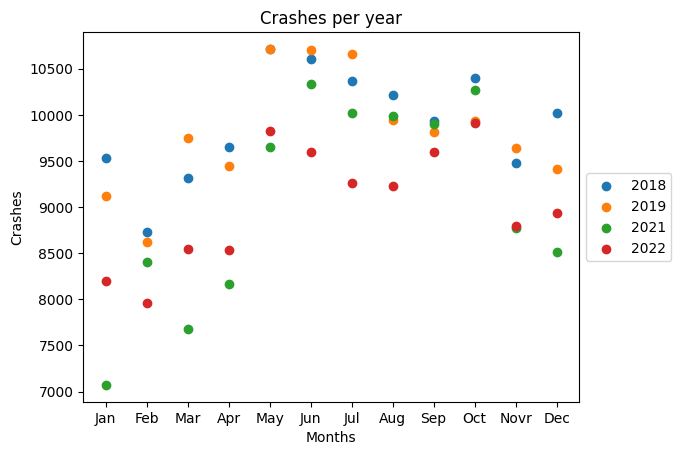

In [17]:
# Plot the data per month
months_label_axis = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Novr', 'Dec']

years_missing_data = []
for year in crashes_per_year:
    year_series = crashes_per_year[year].groupby('CRASH_MONTH').size()
    plt.scatter(months_label_axis, year_series, label=year)

plt.xlabel('Months')
plt.ylabel('Crashes')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Crashes per year")
plt.show()

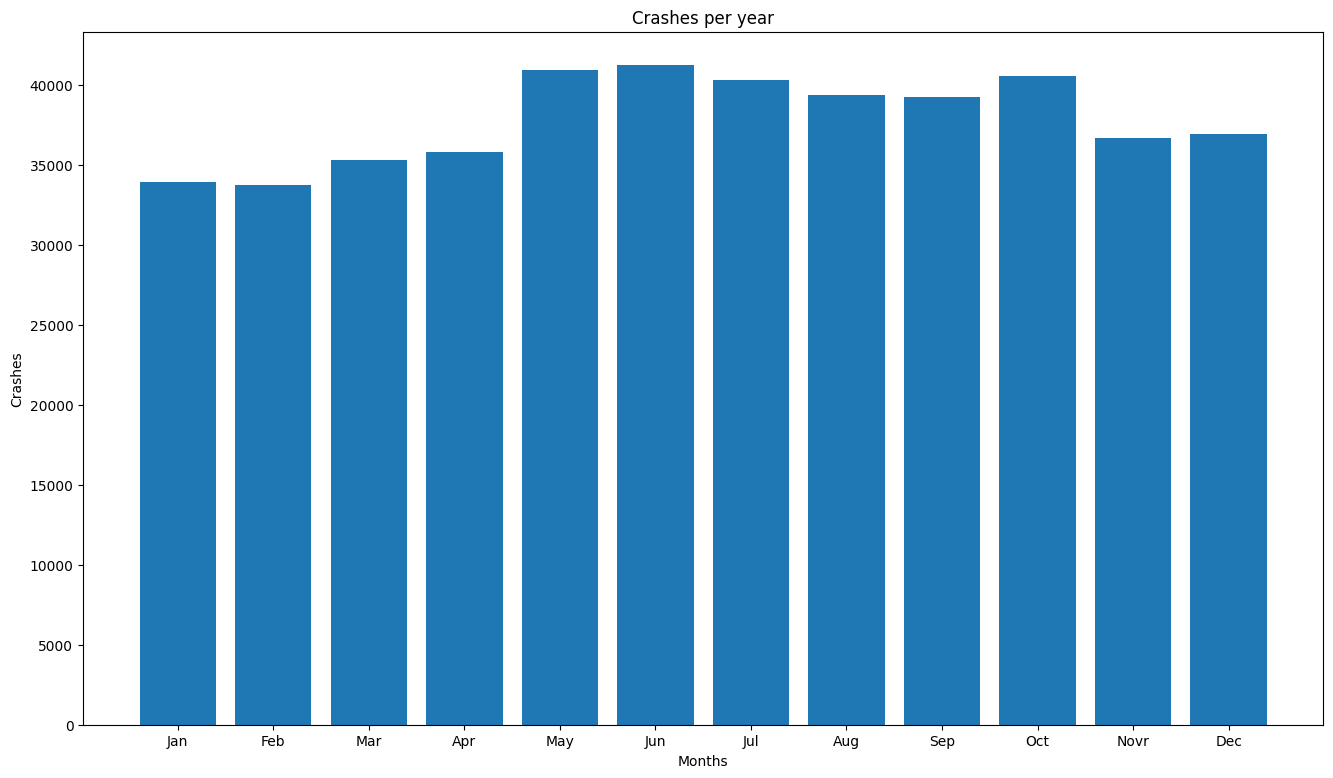

In [18]:
# Define the x axis values
index = np.arange(start=0, step=1 ,stop=months_label_axis.__len__())

# plot the values
plt.bar(index, crashes.groupby('CRASH_MONTH').size())

# Change plot x labels
ax = plt.gca()
ax.set_xticks(index)
ax.set_xticklabels(months_label_axis)

# Change size of plot
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.xlabel('Months')
plt.ylabel('Crashes')
plt.title("Crashes per year")

plt.show()

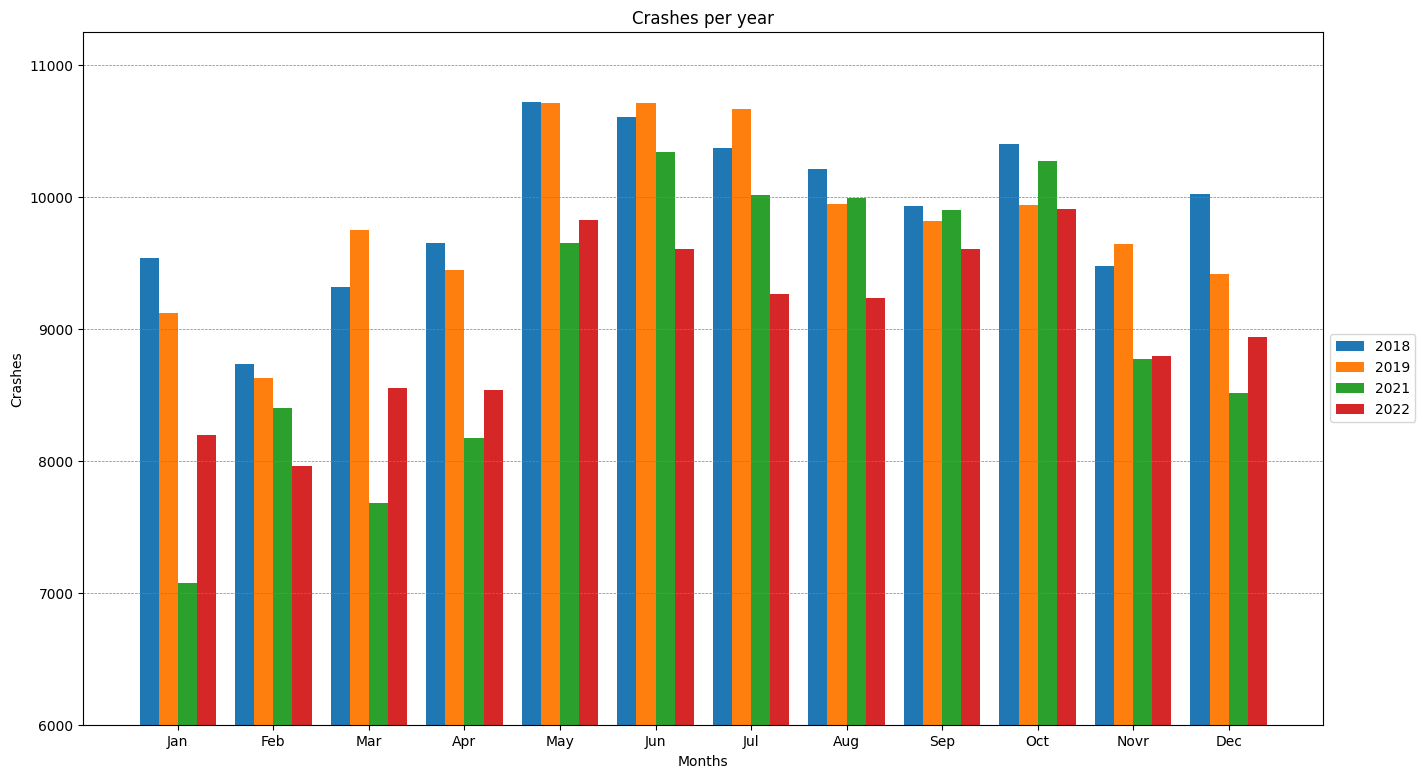

In [19]:
# we use a numpy array to be able to perform mathematical operation on all its values without the need to loop
index = np.arange(start=0, step=1 ,stop=months_label_axis.__len__())

bar_width = 0.2
count_of_years_displayed = 0

# add each year to the plot
for year in crashes_per_year:
    year_series = crashes_per_year[year].groupby('CRASH_MONTH').size()
    # start the line after the line from the previous
    index = index + bar_width
    plt.bar(index, year_series, bar_width, label=year)
    count_of_years_displayed = count_of_years_displayed + 1

        

ax = plt.gca()
ax.set_xticks(index - ((count_of_years_displayed - 1) * bar_width / 2))

plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.5)
ax.set_xticklabels(months_label_axis)
ax.set_ylim(ymin=6000)

fig = plt.gcf()
fig.set_size_inches(16, 9)

plt.xlabel('Months')
plt.ylabel('Crashes')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Crashes per year")
plt.show()

## Results:
May, Jun and October are the months with the most amout of crashes.
The result resonate between the different years

## Compare crashes by hour

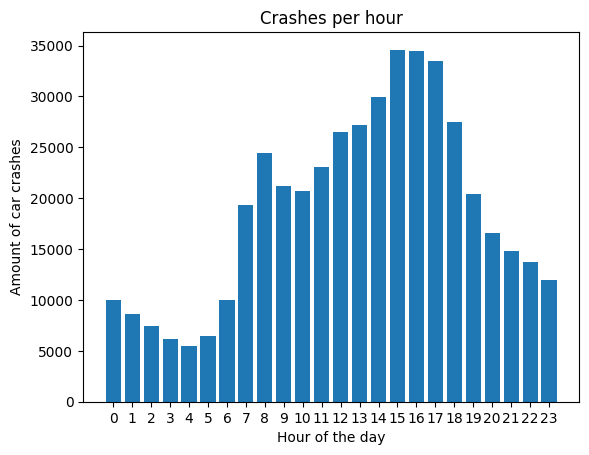

In [20]:
crashes_by_hour = crashes.groupby('CRASH_HOUR').size()


def Plot_time_of_crash(series, plot_name: str, x_label: str, y_label: str):
    plt.bar(series.index.values.tolist(), series)
    ax = plt.gca()
    fig = plt.gcf()
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.title(plot_name)
    plt.xticks(series.index.values.tolist())

    plt.show()

Plot_time_of_crash(crashes_by_hour, 'Crashes per hour', 'Hour of the day', 'Amount of car crashes')

In [21]:
# Divide the day into 4 zones
# Morning 5am to 12pm
# Afternoon 12pm to 5pm
# Evening 5pm to 9pm
# Night 9pm to 4am

morning = range(5, 12)
afternoon = range(12, 18)
evening = range(18, 23)
night = [23, 0, 1, 2, 3, 4]

time_of_day = crashes

time_of_day['DAY_ZONE'] = time_of_day['CRASH_HOUR']


time_of_day.loc[time_of_day['CRASH_HOUR'].isin(morning) , 'DAY_ZONE'] = 'morning'
time_of_day.loc[time_of_day['CRASH_HOUR'].isin(afternoon), 'DAY_ZONE'] = 'afternoon'
time_of_day.loc[time_of_day['CRASH_HOUR'].isin(evening), 'DAY_ZONE'] = 'evening'
time_of_day.loc[time_of_day['CRASH_HOUR'].isin(night), 'DAY_ZONE'] = 'night'


time_of_day['DAY_ZONE'].value_counts()

C:\Users\Euclides\AppData\Local\Temp\ipykernel_10216\873462364.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'morning' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  time_of_day.loc[time_of_day['CRASH_HOUR'].isin(morning) , 'DAY_ZONE'] = 'morning'


DAY_ZONE
afternoon    186103
morning      125073
evening       92975
night         49719
Name: count, dtype: int64

C:\Users\Euclides\AppData\Local\Temp\ipykernel_10216\950555097.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


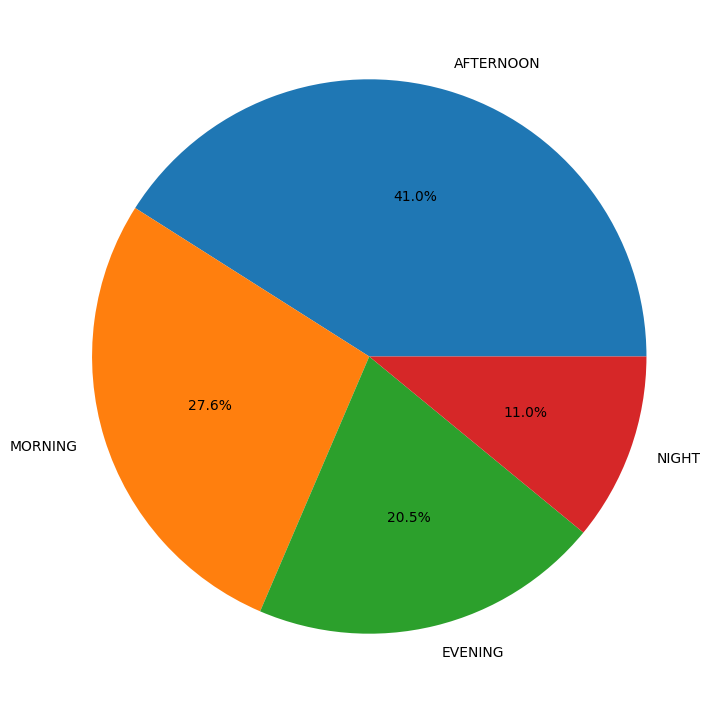

In [24]:
pie = time_of_day['DAY_ZONE'].value_counts().rename_axis('time').reset_index(name='counts')
pie['pie'] = pie['counts']/pie['counts'].sum()



fig, ax = plt.subplots()
ax.pie(pie['pie'],labels= ['AFTERNOON', 'MORNING', 'EVENING', 'NIGHT'], autopct='%1.1f%%')

fig.set_size_inches(16, 9)
fig.show()

## Result:
Mornings and afternoons are the time of day with the most crashes

## Are crashes more probable during holidays??

#### Define holidays

In [13]:
# Checking how holidays affect the crash history
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = pd.to_datetime(cal.holidays(start='2012-01-01', end='2024-12-31').to_pydatetime()).to_series().reset_index().drop(0, axis=1)
holidays

,index
0,2012-01-02
1,2012-01-16
2,2012-02-20
3,2012-05-28
4,2012-07-04
...,...
129,2024-09-02
130,2024-10-14
131,2024-11-11
132,2024-11-28


#### Define crashes that happend during holydays

In [14]:
mask = (crashes['CRASH_DATE'].isin(holidays['index']))
crashes_during_holidays = crashes[mask]

#### Plot data

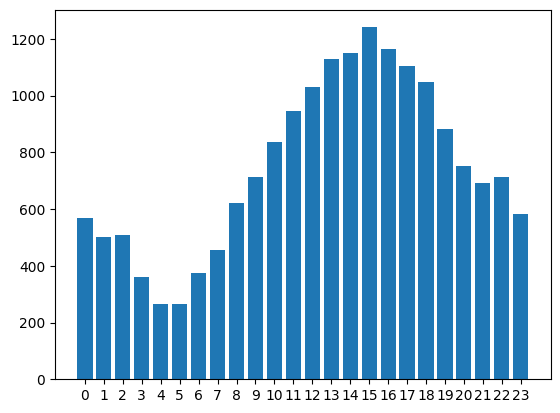

CRASH_RECORD_ID                  17910
CRASH_DATE                       17910
POSTED_SPEED_LIMIT               17910
TRAFFIC_CONTROL_DEVICE           17910
DEVICE_CONDITION                 17910
WEATHER_CONDITION                17910
LIGHTING_CONDITION               17910
FIRST_CRASH_TYPE                 17910
TRAFFICWAY_TYPE                  17910
CRASH_TYPE                       17910
INTERSECTION_RELATED_I            4065
NOT_RIGHT_OF_WAY_I                 884
HIT_AND_RUN_I                     6280
DAMAGE                           17910
DATE_POLICE_NOTIFIED             17910
PRIM_CONTRIBUTORY_CAUSE          17910
SEC_CONTRIBUTORY_CAUSE           17910
BEAT_OF_OCCURRENCE               17910
PHOTOS_TAKEN_I                     231
STATEMENTS_TAKEN_I                 390
DOORING_I                           36
NUM_UNITS                        17910
MOST_SEVERE_INJURY               17857
INJURIES_TOTAL                   17857
INJURIES_FATAL                   17857
INJURIES_INCAPACITATING  

In [15]:
Plot_time_of_crash(crashes_during_holidays.groupby('CRASH_HOUR').size())
crashes_during_holidays.count()

# Is it more possible to crash during a Holiday??

In [16]:
test = pd.Series(crashes['CRASH_DATE'].unique())
test.__len__()
print(f'amount of dates with recorded crashes: {test.__len__()}')

mask = test.isin(holidays['index'].dt.normalize())


print(f'Amount of recorded dates that are holidays: {mask[mask == True].__len__()}')

print(f'porcentage {(mask[mask == True].__len__()/test.__len__())*100}%')

amount of dates with recorded crashes: 2952
Amount of recorded dates that are holidays: 85
porcentage 2.8794037940379402%


#### define if during the holidays there are more than average crashes

In [17]:
crashes_by_date = crashes.groupby('CRASH_DATE').size()

mask = crashes['CRASH_DATE'].isin(holidays['index'])

notHoly_crashes = crashes[~mask].groupby('CRASH_DATE').size()
holiday_by_date = crashes[mask].groupby('CRASH_DATE').size()

print(crashes_by_date.nlargest(20))

CRASH_DATE
2019-01-12    583
2020-02-14    567
2017-11-10    561
2019-11-12    551
2021-10-29    512
2021-12-10    491
2021-09-17    473
2018-06-01    464
2021-06-19    460
2022-12-09    457
2019-10-31    454
2018-01-02    452
2019-06-14    451
2017-10-24    449
2018-05-25    448
2022-11-18    448
2018-04-04    447
2021-06-04    444
2022-10-25    444
2019-10-11    441
dtype: int64


In [18]:
print(holiday_by_date.nlargest(20))

CRASH_DATE
2017-11-10    561
2019-11-11    375
2021-06-18    367
2022-06-20    341
2018-01-01    337
2022-11-11    328
2018-07-04    319
2021-02-15    314
2020-07-03    312
2018-10-08    299
2019-01-01    299
2020-01-01    298
2021-10-11    297
2021-11-11    292
2021-07-05    290
2022-05-30    284
2019-02-18    282
2020-02-17    280
2019-01-21    279
2019-07-04    279
dtype: int64


In [19]:
print(notHoly_crashes.nlargest(20))

CRASH_DATE
2019-01-12    583
2020-02-14    567
2019-11-12    551
2021-10-29    512
2021-12-10    491
2021-09-17    473
2018-06-01    464
2021-06-19    460
2022-12-09    457
2019-10-31    454
2018-01-02    452
2019-06-14    451
2017-10-24    449
2018-05-25    448
2022-11-18    448
2018-04-04    447
2021-06-04    444
2022-10-25    444
2019-10-11    441
2018-02-12    439
dtype: int64


C:\Users\Euclides\AppData\Local\Temp\ipykernel_26204\3822648052.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tt['DAY_OF_MONTH'] = tt['CRASH_DATE'].dt.day


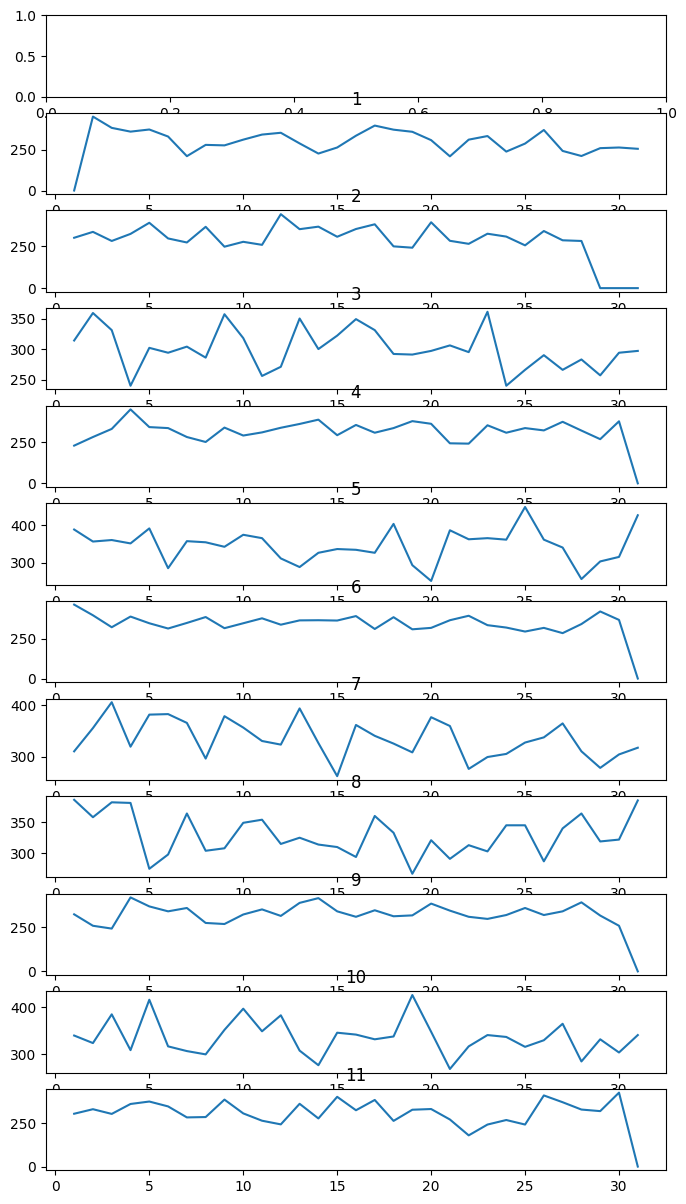

In [21]:
tt = crashes_per_year[2018]
tt['DAY_OF_MONTH'] = tt['CRASH_DATE'].dt.day

figure, axis = plt.subplots(nrows=12, ncols=1)
figure.set_size_inches(8, 15)
for x in range(1, 12):
    group = tt[tt['CRASH_MONTH'] == x].groupby('DAY_OF_MONTH')
    yy = group.agg('size').squeeze()
    goodg = pd.Series([0] * 31, index=pd.RangeIndex(1, 32))
    goodg.loc[goodg.index.intersection(yy.index)] = yy

    # For Sine Function
    axis[x].plot(range(1,32), goodg)
    axis[x].set_title(f"{x}")

    # Combine all the operations and display
    # plt.show()
    # plt.scatter(range(1,32), goodg, label=x)
    # plt.xlabel('days')
    # plt.ylabel('Crashes')
    # plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [82]:
goodg = pd.Series([0] * 31, index=pd.RangeIndex(1, 32))

yy = group.agg('size').squeeze()
yy
goodg.loc[goodg.index.intersection(yy.index)] = yy
goodg
# goodg.reindex(group.agg('size').squeeze(), method='ffill')

1     303
2     329
3     302
4     359
5     373
6     345
7     282
8     284
9     384
10    305
11    263
12    242
13    360
14    276
15    400
16    323
17    382
18    262
19    326
20    330
21    270
22    179
23    241
24    267
25    241
26    408
27    369
28    327
29    318
30    424
31      0
dtype: int64

In [ ]:
plt.plot(   )